<a href="https://colab.research.google.com/github/Saitejamacha/Data_Science_-_AI_ML/blob/main/Timer_Series_Handson_(06_07_2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/AirPassengers (4) (1).csv')

In [ ]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
df.isnull().sum()
# In case we have then don't drop , perform mean imputation

,0
Month,0
#Passengers,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
df.set_index('Month', inplace = True)

In [ ]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


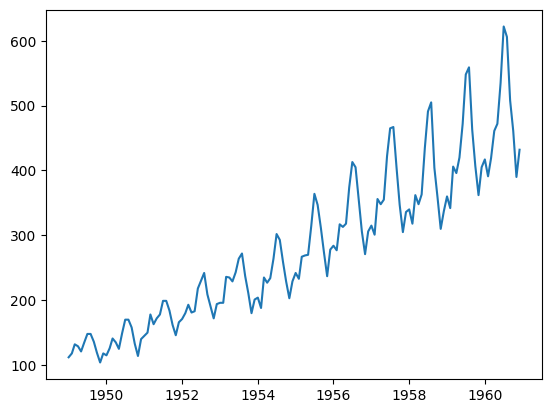

In [ ]:
# Let's check the components of time series

plt.plot(df['#Passengers'])

In [ ]:
# Seasonal decompose to check the presence of components

from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decompose = seasonal_decompose(df['#Passengers'])

Figure(640x480)


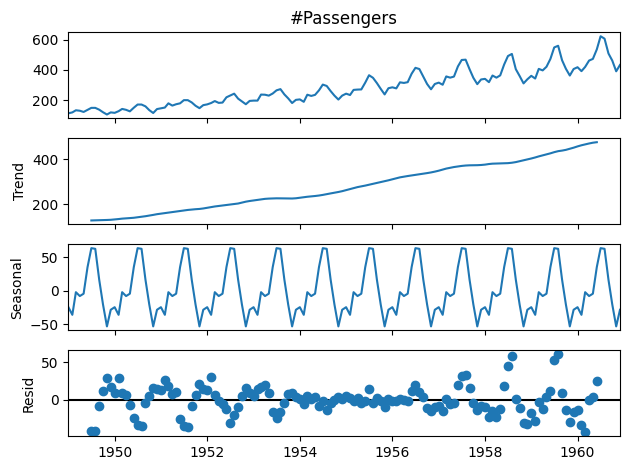

In [ ]:
print(decompose.plot())

In [ ]:
# checking if the data is stationary or not

# Using the ADF test (Augumented - Dickey Fuller Test)


# Null hypothesis - Data is not stationary
# Alternate hypothesis - Data is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df['#Passengers'])

In [ ]:
result

(np.float64(0.8153688792060498),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [ ]:
p_value = result[1]

In [ ]:
p_value

np.float64(0.991880243437641)

In [ ]:
if p_value <= 0.05:
  print("Null hypothesis is rejected , thus data is stationary")
else:
  print("Null hypothesis is accepted , thus data is Non - stationary")

Null hypothesis is accepted , thus data is Non - stationary


In [ ]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()

# rolling means calculation (mean or std) over a sliding time window for every new data point , the window moves one step forward

# Taking average over a fixed number of past values (window) and updating it as new data comes in

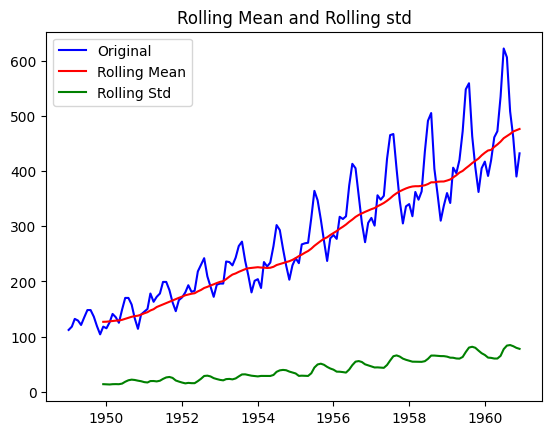

In [ ]:
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean , color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'green', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title("Rolling Mean and Rolling std")
plt.show()

In [ ]:
log_df = np.log(df)


In [ ]:
log_df

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [ ]:
rolling_mean = log_df.rolling(window = 12).mean()
rolling_std = log_df.rolling(window = 12).std()

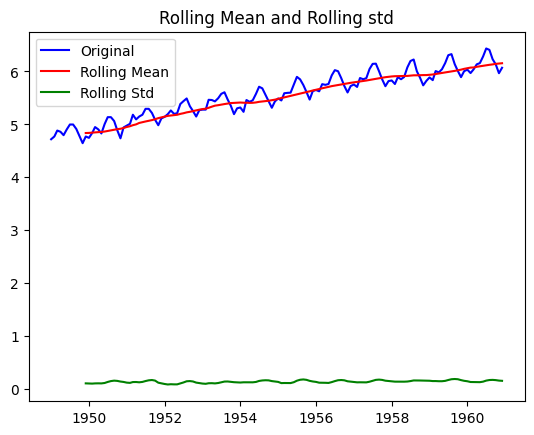

In [ ]:
plt.plot(log_df, color = 'blue', label = 'Original')
plt.plot(rolling_mean , color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'green', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title("Rolling Mean and Rolling std")
plt.show()

In [ ]:
log_df

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result_log = adfuller(log_df['#Passengers'])

In [ ]:
result_log

(np.float64(-1.7170170891069683),
 np.float64(0.4223667747703874),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(-445.3990312497209))

In [ ]:
p_value_log = result_log[1]

In [ ]:
p_value_log

np.float64(0.4223667747703874)

In [ ]:
if p_value_log <= 0.05:
  print("Null hypothesis is rejected , thus data is stationary")
else:
  print("Null hypothesis is accepted , thus data is Non - stationary")

Null hypothesis is accepted , thus data is Non - stationary


# Log transformation - make the variance constant

# Differncing - make the means constant

In [ ]:
# performing the differncing 1 time
diff_data = log_df.diff()

In [ ]:
diff_data

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


In [ ]:
diff_data.dropna(inplace = True)

In [ ]:
rolling_mean = diff_data.rolling(window =12).mean()
rolling_std = diff_data.rolling(window = 12).std()

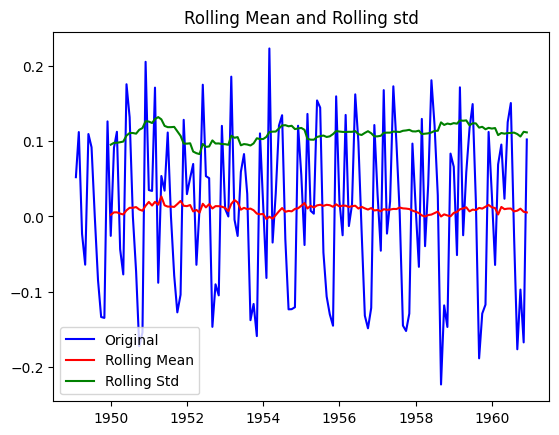

In [ ]:
plt.plot(diff_data, color = 'blue', label = 'Original')
plt.plot(rolling_mean , color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'green', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title("Rolling Mean and Rolling std")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result_diff = adfuller(diff_data['#Passengers'])

In [ ]:
p_value_diff = result_diff[1]

In [ ]:
p_value_diff

np.float64(0.07112054815086184)

In [ ]:
if p_value_diff <= 0.05:
  print("Null hypothesis is rejected , thus data is stationary")
else:
  print("Null hypothesis is accepted , thus data is Non - stationary")

Null hypothesis is accepted , thus data is Non - stationary


In [ ]:
# second_diff = log_df.diff().diff()

In [ ]:
# second_diff

# Let's consider the above data as stationary as we don't want to loose more data and also we got the marginal p value

In [ ]:
# Thus we got the differencing order (d=1)

# Model Implementation

In [ ]:
log_df

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [ ]:
# Let's split the data for training and testing

train = log_df.iloc[:120,:]
test = log_df.iloc[120:,:]

In [ ]:
train

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1958-08-01,6.224558
1958-09-01,6.001415
1958-10-01,5.883322


In [ ]:
test

,#Passengers
Month,
1959-01-01,5.886104
1959-02-01,5.834811
1959-03-01,6.006353
1959-04-01,5.981414
1959-05-01,6.040255
1959-06-01,6.156979
1959-07-01,6.306275
1959-08-01,6.326149
1959-09-01,6.137727


# ARIMA

# AR - P  - uses past values to predict the current one
# I - D  - How many times the data is differenced to make it stationary
# MA - Q - usrs past errors (residuals) to improve forecast



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train,order = (1,1,2))  # order of Arima (p = ? , d = 1 , q = ?) let's take some random values for p and q

In [ ]:
model = model.fit()

In [ ]:
log_df['Arima_Prediction'] = model.predict(start = len(train), end = len(train) + len(test) - 1)

In [ ]:
# start = 120 th --- 121st

# end = 120 + 24 -1 = 143 it ends at 144th point

In [ ]:
log_df

,#Passengers,Arima_Prediction
Month,,
1949-01-01,4.718499,NaN
1949-02-01,4.770685,NaN
1949-03-01,4.882802,NaN
1949-04-01,4.859812,NaN
1949-05-01,4.795791,NaN
...,...,...
1960-08-01,6.406880,5.912387
1960-09-01,6.230481,5.912387
1960-10-01,6.133398,5.912387


In [ ]:
len(train)

120

In [ ]:
len(test)

24

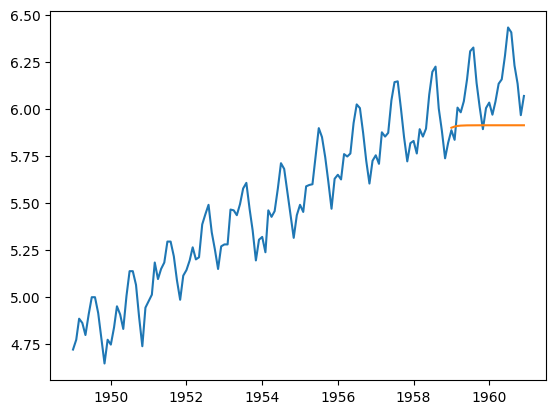

In [ ]:
plt.plot(log_df)

# we are not getting good prediction becuase we are not taking optimal values for p , d and q now we will be using itertools to get the optimal values

In [ ]:
# wewill use itertools to get the optimal value of p,d,q

import itertools

p = range(1,8)
d = range(1,2)
q = range(1,8)
pdq_combination = list(itertools.product(p,d,q))
pdq_combination

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7)]

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
rmse = []
order1 = []

for pdq in pdq_combination:
  model = ARIMA(train , order = pdq)
  model_fit = model.fit()
  pred = model_fit.predict(start = len(train), end = len(train) + len(test) - 1)
  error = np.sqrt(mean_squared_error(test,pred))
  order1.append(pdq)
  rmse.append(error)

results = pd.DataFrame(index = order1, data = rmse , columns = ['RMSE'])

In [ ]:
results

,RMSE
"(1, 1, 1)",0.289325
"(1, 1, 2)",0.246956
"(1, 1, 3)",0.247057
"(1, 1, 4)",0.236253
"(1, 1, 5)",0.193841
"(1, 1, 6)",0.210377
"(1, 1, 7)",0.209615
"(2, 1, 1)",0.237033
"(2, 1, 2)",0.250448
"(2, 1, 3)",0.247742


In [ ]:
results.sort_values(by = 'RMSE', ascending = True)

,RMSE
"(5, 1, 4)",0.155013
"(6, 1, 4)",0.158187
"(7, 1, 7)",0.165622
"(7, 1, 5)",0.171635
"(7, 1, 4)",0.176668
"(6, 1, 5)",0.182591
"(7, 1, 2)",0.189217
"(7, 1, 3)",0.189703
"(5, 1, 5)",0.189813
"(1, 1, 5)",0.193841


In [ ]:
from  statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train , order = (5,1,4))

In [ ]:
model = model.fit()

In [ ]:
log_df['Arima_Prediction'] = model.predict(start = len(train), end = len(train) + len(test) - 1)

In [ ]:
log_df

,#Passengers,Arima_Prediction
Month,,
1949-01-01,4.718499,NaN
1949-02-01,4.770685,NaN
1949-03-01,4.882802,NaN
1949-04-01,4.859812,NaN
1949-05-01,4.795791,NaN
...,...,...
1960-08-01,6.406880,6.073565
1960-09-01,6.230481,6.016085
1960-10-01,6.133398,5.930742


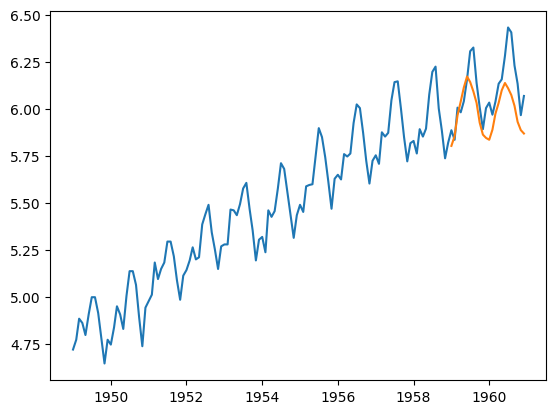

In [ ]:
plt.plot(log_df)

In [ ]:
# implementation of sarima


(p,d,q,s) are the seasonal parameters

p : The order of seasonal autoregressive (SAR)

d : The order of seasonal differnencing

q : The order of seasonal Moving Average

s : the length of seaosnal cycle (eg - 12 for monthly with year seaosnality , or 4 for quarterly data)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
s_model = SARIMAX(train , order = (5,1,4) , seasonal_order = (5,1,4,12))

In [ ]:
s_model = s_model.fit()

In [ ]:
log_df['Sarima_Prediction'] = s_model.predict(start = len(train), end = len(train) + len(test) - 1)

In [ ]:
log_df

,#Passengers,Arima_Prediction,Sarima_Prediction
Month,,,
1949-01-01,4.718499,NaN,NaN
1949-02-01,4.770685,NaN,NaN
1949-03-01,4.882802,NaN,NaN
1949-04-01,4.859812,NaN,NaN
1949-05-01,4.795791,NaN,NaN
...,...,...,...
1960-08-01,6.406880,6.073565,6.338585
1960-09-01,6.230481,6.016085,6.165951
1960-10-01,6.133398,5.930742,6.034450


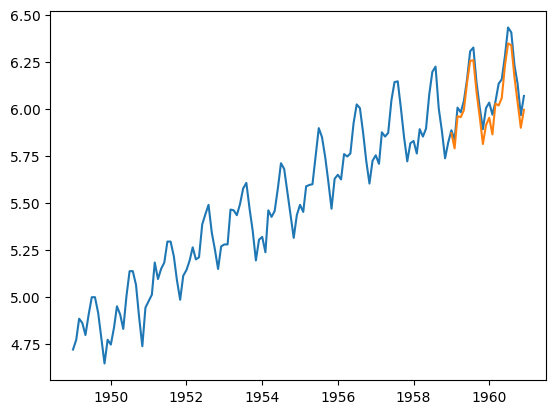

In [ ]:
plt.plot(log_df['#Passengers'])
plt.plot(log_df['Sarima_Prediction'])

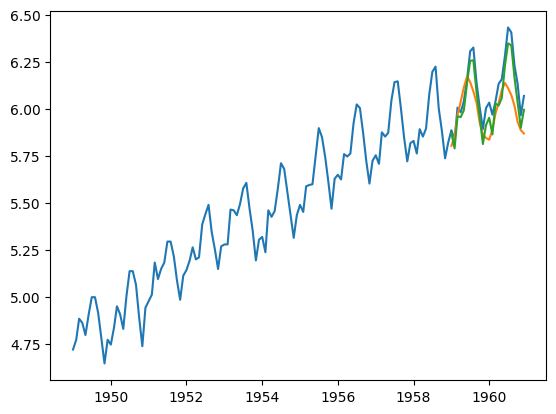

In [ ]:
plt.plot(log_df)

In [ ]:
# forecast

future = s_model.forecast(steps = 60)

In [ ]:
future

,predicted_mean
1959-01-01,5.870420
1959-02-01,5.789432
1959-03-01,5.960329
1959-04-01,5.955760
1959-05-01,5.992145
1959-06-01,6.138351
1959-07-01,6.255467
1959-08-01,6.258533
1959-09-01,6.087687
1959-10-01,5.958353


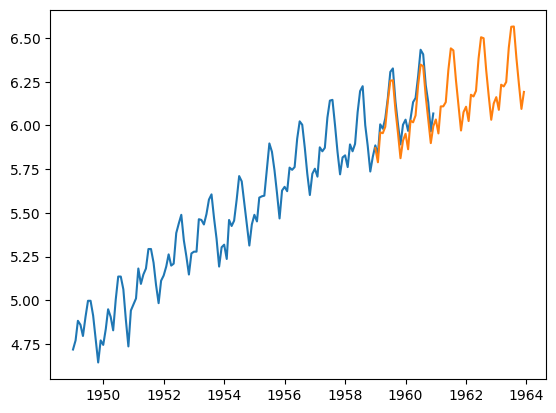

In [ ]:
plt.plot(log_df['#Passengers'])
plt.plot(future)

In [ ]:
round(np.exp(future))  # Actual passenger values

,predicted_mean
1959-01-01,354.0
1959-02-01,327.0
1959-03-01,388.0
1959-04-01,386.0
1959-05-01,400.0
1959-06-01,463.0
1959-07-01,521.0
1959-08-01,522.0
1959-09-01,440.0
1959-10-01,387.0
